# Coursera Case Study 1: Revisited

## Introduction
This notebook is a repeat of the work done on a case study for the Coursera's Google Data Analytics Certificate program. The work was previously performed in Excel and R, with an RMarkdown HTML document as the output. The goal here is to repeat and document the steps taken to clean and analyze the data. This is missing from the write-up found over at my [Kaggle site](https://www.kaggle.com/code/scwilso28/coursera-case-study-1-cyclistic-data-analysis).

The data cleanup steps performed in my other Jupyter notebook on [Github](https://github.com/cwilso28/my-first-jupyter-notebook) will be used here, but with some modifications to account for the large datafiles used in the case study.

Performing all of the data cleaning and analysis in a Jupyter notebook was a good exercise. The mixed use of python and R was a great learning experience.

## Data Cleaning

The data cleaning process starts off with importing the necessary packages for python as well as enabling the extension for R script. Python is used for a majority of this process, but I reused R code to plot the data. I like the ease of plotting with R, the layers are more intuitive to me. 

As a note, there is a warning that pops up when enabling the rpy2 extension. The 'quartz' package is for MacOS and Linux, but I'm running Windows so I'm not sure how to address this issue. There are a few threads, [here](https://github.com/rpy2/rpy2/issues/738) and [here](https://github.com/rpy2/rpy2/issues/695), about this online, but I didn't see a solution. This will require further investigation.

In [1]:
import pandas as pd
import numpy as np
import zipfile
from os import listdir
%load_ext rpy2.ipython

C:\Users\Chris\AppData\Local\Programs\Python\Python310\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


I don't need all of the columns in the files, so I filtered out the unused columns to reduce the size of the incoming data. As shown later, the dataframe still ends up quite large. In addition, I did away with creating duplicates of the data by unzipping the folders in my /Datasets folder and instead letting python handle that. No need to take up more diskspace than I already have.

In [2]:
to_import = ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'end_station_name', 'member_casual']
my_files = [f for f in listdir('Datasets')]

In [3]:
zf = zipfile.ZipFile('Datasets/'+my_files[0])
df = pd.read_csv(zf.open(zf.namelist()[0]), usecols = to_import)

In [4]:
for file in my_files[1:]:
    zf = zipfile.ZipFile('Datasets/' + file)
    data = pd.read_csv(zf.open(zf.namelist()[0]), usecols = to_import)
    print('File name: ' + zf.namelist()[0] + '; File length: ' + str(len(data)))
    df = pd.concat([df, data], ignore_index=True)


File name: 202104-divvy-tripdata.csv; File length: 337230
File name: 202105-divvy-tripdata.csv; File length: 531633
File name: 202106-divvy-tripdata.csv; File length: 729595
File name: 202107-divvy-tripdata.csv; File length: 822410
File name: 202108-divvy-tripdata.csv; File length: 804352
File name: 202109-divvy-tripdata.csv; File length: 756147
File name: 202110-divvy-tripdata.csv; File length: 631226
File name: 202111-divvy-tripdata.csv; File length: 359978
File name: 202112-divvy-tripdata.csv; File length: 247540
File name: 202201-divvy-tripdata.csv; File length: 103770
File name: 202202-divvy-tripdata.csv; File length: 115609
File name: 202203-divvy-tripdata.csv; File length: 284042


In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,Stave St & Armitage Ave,casual
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,Central Park Ave & Bloomingdale Ave,casual
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,Halsted St & 35th St,casual
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,Broadway & Sheridan Rd,casual
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,Chicago Ave & Sheridan Rd,casual


In [6]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952028 entries, 0 to 5952027
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ride_id             object
 1   rideable_type       object
 2   started_at          object
 3   ended_at            object
 4   start_station_name  object
 5   end_station_name    object
 6   member_casual       object
dtypes: object(7)
memory usage: 2.8 GB


As mentioned before, this dataframe is pretty large, at least for this project. The next steps attempt to reduce this file size by assigning less memory-consuming file types, including `datetime64` and `int64` data types. This helps shave off a 1 GB of memory usage.

In [7]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
membership_values = {'casual': 0, 'member': 1}
df['member_casual'] = df['member_casual'].map(membership_values)

In [8]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952028 entries, 0 to 5952027
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   member_casual       int64         
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.7 GB


In [9]:
duplicate_check = ['rideable_type', 'started_at', 'ended_at', 'start_station_name', 'end_station_name', 'member_casual']
duplicate_entries = df[df.duplicated(subset = duplicate_check, keep = False)]
duplicate_entries = duplicate_entries.drop_duplicates(subset = duplicate_check)
print(len(duplicate_entries))

565


In [10]:
print(100*len(duplicate_entries)/len(df))

0.009492562871008


In [11]:
print(len(df))

5952028


In [12]:
df.drop_duplicates(subset = duplicate_check, inplace = True)
print(len(df))

5951462


In [13]:
df['ride_duration'] = df.ended_at - df.started_at
df[['started_at', 'ended_at', 'ride_duration']].head()

,started_at,ended_at,ride_duration
0,2021-03-16 08:32:30,2021-03-16 08:36:34,0 days 00:04:04
1,2021-03-28 01:26:28,2021-03-28 01:36:55,0 days 00:10:27
2,2021-03-11 21:17:29,2021-03-11 21:33:53,0 days 00:16:24
3,2021-03-11 13:26:42,2021-03-11 13:55:41,0 days 00:28:59
4,2021-03-21 09:09:37,2021-03-21 09:27:33,0 days 00:17:56


In [14]:
print(df.ride_duration.min())

-1 days +23:01:58


In [15]:
zero_timedelta = pd.to_timedelta(0)
column = df['ride_duration']
print(column[column < zero_timedelta].count())

147


In [16]:
df['ride_duration'].to_numpy()[df['ride_duration'].to_numpy() < zero_timedelta] = zero_timedelta
# df.loc[df['ride_duration'] < zero_timedelta] = zero_timedelta
print(column[column < zero_timedelta].count())

0


In [17]:
df['ride_duration_hrs'] = df.ride_duration / np.timedelta64(1, 'h')
df['day_of_week'] = df.started_at.dt.dayofweek
df['started_at_date'] = pd.to_datetime(df.started_at.dt.date)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_duration,ride_duration_hrs,day_of_week,started_at_date
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,Stave St & Armitage Ave,0,0 days 00:04:04,0.067778,1,2021-03-16
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,Central Park Ave & Bloomingdale Ave,0,0 days 00:10:27,0.174167,6,2021-03-28
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,Halsted St & 35th St,0,0 days 00:16:24,0.273333,3,2021-03-11
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,Broadway & Sheridan Rd,0,0 days 00:28:59,0.483056,3,2021-03-11
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,Chicago Ave & Sheridan Rd,0,0 days 00:17:56,0.298889,6,2021-03-21


## Data Analysis

In [18]:
print("Total number of casual riders: {} riders".format(df['member_casual'][df['member_casual'] == 0].count()))
print("Total number of member riders: {} riders".format(df['member_casual'][df['member_casual'] == 1].count()))

Total number of casual riders: 2630236 riders
Total number of member riders: 3321226 riders


## Data Aggregation

### Number of riders per day and membership status

In [19]:
daily_ridership = df.groupby(['started_at_date', 'member_casual']).agg(
    average_ride_length = pd.NamedAgg(column = 'ride_duration_hrs', aggfunc = 'mean'),
    number_of_riders = pd.NamedAgg(column = 'ride_id', aggfunc = 'count'),
    max_ride_length = pd.NamedAgg(column = 'ride_duration_hrs', aggfunc = 'max'),
    min_ride_length = pd.NamedAgg(column = 'ride_duration_hrs', aggfunc = 'min')).sort_values(['started_at_date', 'member_casual'])
daily_ridership.reset_index(inplace = True)

print(daily_ridership)

    started_at_date  member_casual  average_ride_length  number_of_riders  \
0        2021-03-01              0             0.516692               582   
1        2021-03-01              1             0.186846              2885   
2        2021-03-02              0             0.755977               795   
3        2021-03-02              1             0.205193              3290   
4        2021-03-03              0             0.466620              1474   
..              ...            ...                  ...               ...   
787      2022-03-29              1             0.178996              7001   
788      2022-03-30              0             0.304134              1035   
789      2022-03-30              1             0.165272              4519   
790      2022-03-31              0             0.253142              1555   
791      2022-03-31              1             0.167911              5643   

     max_ride_length  min_ride_length  
0          43.562778         0.0013

In [20]:
membership_reverse = {value: key for key, value in membership_values.items()}
daily_ridership['member_casual'] = daily_ridership['member_casual'].map(membership_reverse)
print(daily_ridership)

    started_at_date member_casual  average_ride_length  number_of_riders  \
0        2021-03-01        casual             0.516692               582   
1        2021-03-01        member             0.186846              2885   
2        2021-03-02        casual             0.755977               795   
3        2021-03-02        member             0.205193              3290   
4        2021-03-03        casual             0.466620              1474   
..              ...           ...                  ...               ...   
787      2022-03-29        member             0.178996              7001   
788      2022-03-30        casual             0.304134              1035   
789      2022-03-30        member             0.165272              4519   
790      2022-03-31        casual             0.253142              1555   
791      2022-03-31        member             0.167911              5643   

     max_ride_length  min_ride_length  
0          43.562778         0.001389  
1      

### Number of riders per day of the week and membership status

In [21]:
dayofweek_ridership = df.groupby(['day_of_week', 'member_casual']).agg(rider_count = pd.NamedAgg(column = 'member_casual', aggfunc = 'count'))
dayofweek_ridership.reset_index(inplace=True)
print(dayofweek_ridership)

    day_of_week  member_casual  rider_count
0             0              0       304957
1             0              1       462246
2             1              0       286811
3             1              1       513615
4             2              0       295259
5             2              1       522704
6             3              0       299091
7             3              1       491281
8             4              0       372013
9             4              1       470964
10            5              0       572011
11            5              1       454439
12            6              0       500094
13            6              1       405977


In [22]:
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
dayofweek_ridership['day_of_week'] = dayofweek_ridership['day_of_week'].map(day_names)

In [23]:
dayofweek_ridership['member_casual'] = dayofweek_ridership['member_casual'].map(membership_reverse)
print(dayofweek_ridership)

   day_of_week member_casual  rider_count
0       Monday        casual       304957
1       Monday        member       462246
2      Tuesday        casual       286811
3      Tuesday        member       513615
4    Wednesday        casual       295259
5    Wednesday        member       522704
6     Thursday        casual       299091
7     Thursday        member       491281
8       Friday        casual       372013
9       Friday        member       470964
10    Saturday        casual       572011
11    Saturday        member       454439
12      Sunday        casual       500094
13      Sunday        member       405977


### Riders per station, starting and ending

In [24]:
start_station_riders = df.groupby(['start_station_name', 'member_casual']).agg(rider_count = pd.NamedAgg(column = 'ride_id', aggfunc = 'count')).sort_values(['rider_count'], ascending = False)
start_station_riders.reset_index(inplace = True)
start_station_riders['member_casual'] = start_station_riders['member_casual'].map(membership_reverse)
print(start_station_riders)

                                start_station_name member_casual  rider_count
0                          Streeter Dr & Grand Ave        casual        68896
1                                  Millennium Park        casual        34740
2                            Michigan Ave & Oak St        casual        30549
3                         Kingsbury St & Kinzie St        member        26310
4                                Clark St & Elm St        member        26211
...                                            ...           ...          ...
1708                           Avenue L & 114th St        member            1
1709                   Whipple St & Irving Park Rd        member            1
1710  Pawel Bialowas - Test- PBSC charging station        casual            1
1711               Lyft Driver Center Private Rack        member            1
1712                   N Damen Ave & W Wabansia St        member            1

[1713 rows x 3 columns]


In [25]:
end_station_riders = df.groupby(['end_station_name', 'member_casual']).agg(rider_count = pd.NamedAgg(column = 'ride_id', aggfunc = 'count')).sort_values(['rider_count'], ascending = False)
end_station_riders.reset_index(inplace = True)
end_station_riders['member_casual'] = end_station_riders['member_casual'].map(membership_reverse)
print(end_station_riders)

                                  end_station_name member_casual  rider_count
0                          Streeter Dr & Grand Ave        casual        71187
1                                  Millennium Park        casual        35737
2                            Michigan Ave & Oak St        casual        32014
3                                Clark St & Elm St        member        26359
4                         Kingsbury St & Kinzie St        member        26183
...                                            ...           ...          ...
1702                            Troy Ave & 27th St        member            1
1703  Pawel Bialowas - Test- PBSC charging station        casual            1
1704                        Indiana Ave & 133rd St        casual            1
1705                       Maplewood Ave & 59th St        member            1
1706                   Burnham Greenway & 112th St        member            1

[1707 rows x 3 columns]


In [26]:
%%R
library(tidyverse)
library(lubridate)
library(tidyquant)
library(repr)
options(scipen=10000)


R[write to console]: -- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

R[write to console]: v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

R[write to console]: -- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

R[write to console]: 
Attaching package: 'lubridate'


R[write to console]: The following objects are masked from 'package:base':

    date, intersect, setdiff, union


R[write to console]: Loading required package: PerformanceAnalytics

R[write to console]: Loading required package: xts

R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: 'zoo'


R[write to console]: The following objects are masked from 'package:base':

    

In [27]:
%%R -i daily_ridership
daily_ridership$started_at_date <- ymd(daily_ridership$started_at_date)
#head(daily_ridership)

C:\Users\Chris\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2211: PytzUsageWarning: The zone attribute is specific to pytz's interface; please migrate to a new time zone provider. For more details on how to do so, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  values, tz_parsed = conversion.datetime_to_datetime64(data.ravel("K"))
C:\Users\Chris\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:7124: PytzUsageWarning: The zone attribute is specific to pytz's interface; please migrate to a new time zone provider. For more details on how to do so, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  result = lib.maybe_convert_objects(
C:\Users\Chris\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2211: PytzUsageWarning: The zone attribute is specific to pytz's interface; please migrate to a new time zone provider. Fo

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



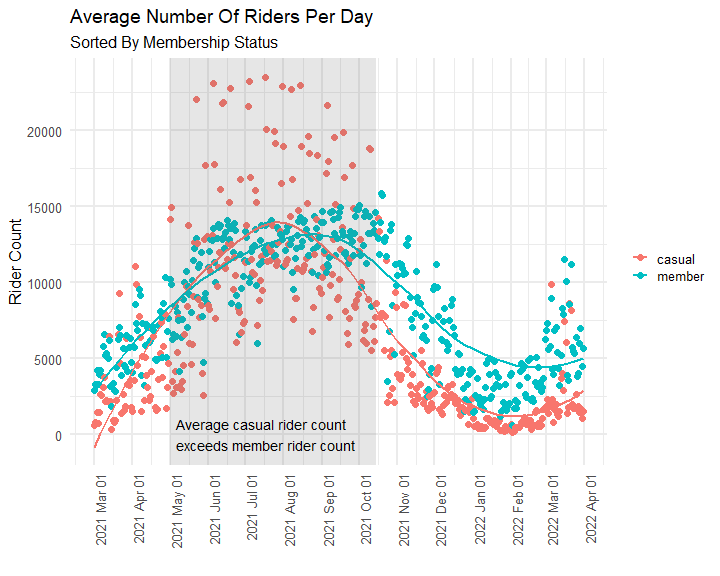

In [28]:
%%R -w 720 -h 576 -u px
ride_count_plot <- ggplot(data = daily_ridership, mapping = aes(x = started_at_date, y = number_of_riders, group = member_casual, color = member_casual))
ride_count_plot <- ride_count_plot + geom_point(size=3)
ride_count_plot <- ride_count_plot + theme_minimal(base_size = 16)
ride_count_plot <- ride_count_plot + geom_smooth(method = NULL, se=FALSE)
ride_count_plot <- ride_count_plot + scale_x_date(date_labels = "%Y %b %d", date_breaks = "1 months")
ride_count_plot <- ride_count_plot + theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.title = element_blank())
ride_count_plot <- ride_count_plot + labs(title="Average Number Of Riders Per Day", subtitle="Sorted By Membership Status", x="", y="Rider Count")
ride_count_annotate <- ride_count_plot + annotate(geom = "rect", 
                                                  xmin = as.Date("2021-05-01"), 
                                                  xmax = as.Date("2021-10-15"), 
                                                  ymin = -Inf, ymax = Inf, 
                                                  alpha = 0.15)
ride_count_annotate <- ride_count_annotate + annotate(geom = "text", 
                                                      x=as.Date("2021-05-06"), 
                                                      y = 10, 
                                                      label = "Average casual rider count\nexceeds member rider count", 
                                                      hjust = 0,
                                                      size = 5)
plot(ride_count_annotate)


In [29]:
%%R -i dayofweek_ridership

# Set a custom order for the clustered bar chart
dayofweek_ridership$day_of_week <- factor(dayofweek_ridership$day_of_week, levels = c('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'))



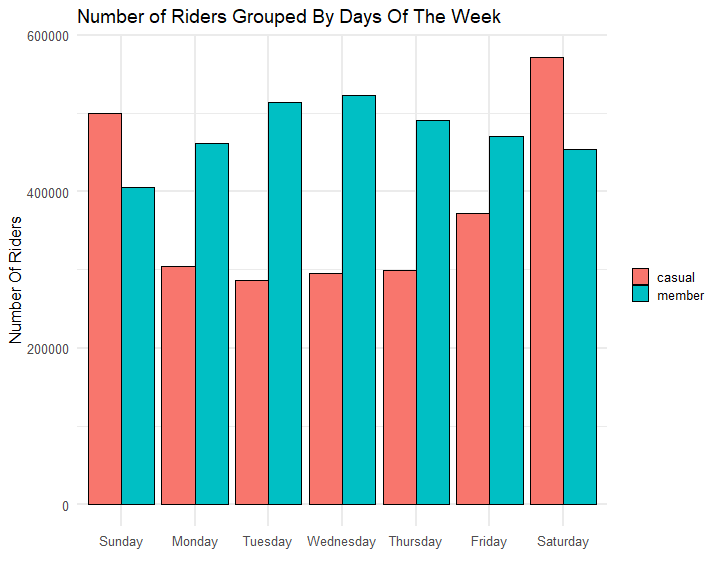

In [30]:
%%R -w 720 -h 576 -u px
dayofweek <- ggplot(data = dayofweek_ridership, aes(x=day_of_week, y=rider_count, fill=member_casual))
dayofweek <- dayofweek + geom_bar(stat='identity', position='dodge', color='black')
dayofweek <- dayofweek + guides(fill=guide_legend(title=NULL)) # Remove legend title
dayofweek <- dayofweek + labs(title="Number of Riders Grouped By Days Of The Week", x="", y="Number Of Riders")
dayofweek <- dayofweek + theme_minimal(base_size = 16)
plot(dayofweek)

In [31]:
%%R -i start_station_riders
startstation_filtered <- start_station_riders %>% 
  dplyr::filter(member_casual == 'casual') %>% 
  slice(1:10) %>%
  arrange(rider_count) %>% 
  dplyr::mutate(start_station_name = forcats::fct_rev(forcats::fct_inorder(start_station_name)))

start_stations_ordered <- start_station_riders %>%
  mutate(start_station_name = factor(start_station_name, levels = startstation_filtered$start_station_name, ordered = TRUE)) %>%
  drop_na() %>%
  ggplot(aes(x = rider_count, y = start_station_name, fill = member_casual))

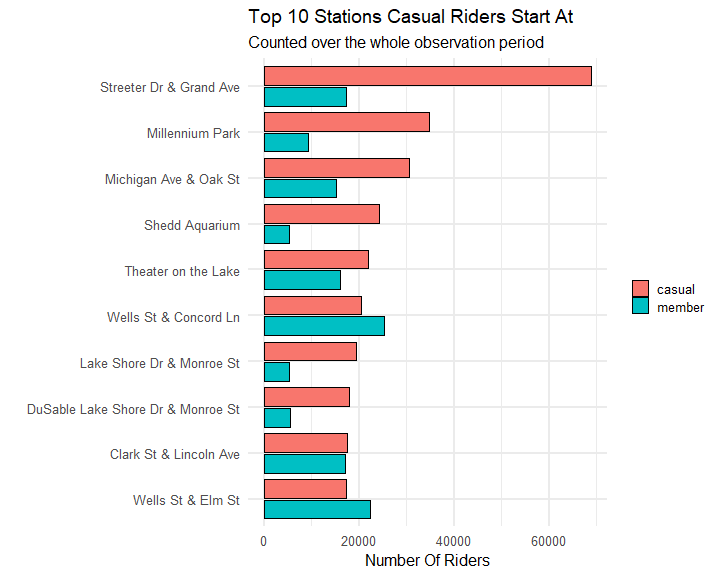

In [32]:
%%R -w 720 -h 576 -u px
startstations_filtered_plot <- start_stations_ordered + geom_bar(stat = 'identity', position = position_dodge2(reverse = TRUE), color = "black")
startstations_filtered_plot <- startstations_filtered_plot + theme_minimal(base_size = 16)
startstations_filtered_plot <- startstations_filtered_plot + labs(title="Top 10 Stations Casual Riders Start At", subtitle="Counted over the whole observation period", x="Number Of Riders", y="")
startstations_filtered_plot <- startstations_filtered_plot + theme(legend.title=element_blank())
plot(startstations_filtered_plot)

In [33]:
%%R -i end_station_riders
endstation_filtered <- end_station_riders %>% 
  dplyr::filter(member_casual == 'casual') %>% 
  slice(1:10) %>%
  arrange(rider_count) %>% # Order the data in ascending order which will be plotted in reverse
  dplyr::mutate(end_station_name = forcats::fct_rev(forcats::fct_inorder(end_station_name))) # Set the order of the station names

end_stations_ordered <- end_station_riders %>%
  mutate(end_station_name = factor(end_station_name, levels = endstation_filtered$end_station_name, ordered = TRUE)) %>%
  drop_na() %>%
  ggplot(aes(x = rider_count, y = end_station_name, fill = member_casual))

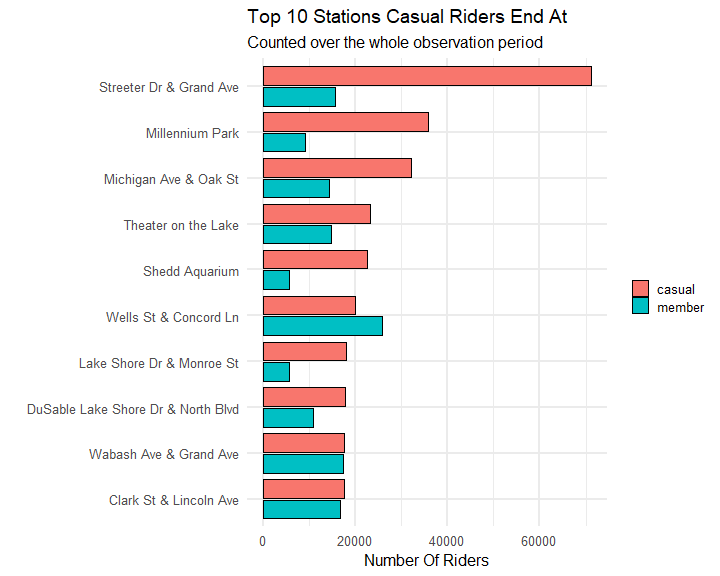

In [34]:
%%R -w 720 -h 576 -u px
endstations_filtered_plot <- end_stations_ordered + geom_bar(stat = 'identity', position = position_dodge2(reverse = TRUE), color = "black") # create the grouped bar charts with the position of the casual member bars swapped
endstations_filtered_plot <- endstations_filtered_plot + theme_minimal(base_size = 16)
endstations_filtered_plot <- endstations_filtered_plot + labs(title="Top 10 Stations Casual Riders End At", subtitle="Counted over the whole observation period", x="Number Of Riders", y="")
endstations_filtered_plot <- endstations_filtered_plot + theme(legend.title=element_blank())
plot(endstations_filtered_plot)

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



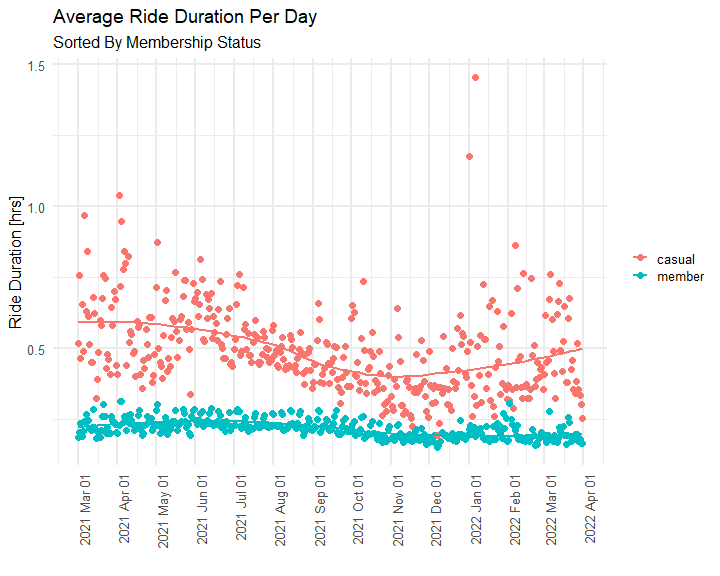

In [35]:
%%R -w 720 -h 576 -u px
ride_length_plot <-ggplot(data = daily_ridership, mapping = aes(x = started_at_date, y = average_ride_length, group = member_casual, color = member_casual))
ride_length_plot <- ride_length_plot + geom_point(size = 3)
ride_length_plot <- ride_length_plot + geom_smooth(method = NULL, se=FALSE)
ride_length_plot <- ride_length_plot + theme_minimal(base_size = 16)
ride_length_plot <- ride_length_plot + scale_x_date(date_labels = "%Y %b %d", date_breaks = "1 months")
ride_length_plot <- ride_length_plot + theme(axis.text.x=element_text(angle=90, hjust=1), legend.title=element_blank())
ride_length_plot <- ride_length_plot + labs(title="Average Ride Duration Per Day", subtitle="Sorted By Membership Status", x="", y="Ride Duration [hrs]")
plot(ride_length_plot)